In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


%matplotlib inline

In [2]:
#load data
raw_data = pd.read_csv('austin_crime.csv')
raw_data.name = 'Raw Data'
#view data
raw_data

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159462,Austin TX 78741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check out data if all rows with NaN's are dropped
drop_nans = raw_data.copy().dropna()

drop_nans

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
9,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,-97.730002,Auto Theft,2014-04-04 00:00:00,2.014941e+09,3118304.0,10072414.0,2014.0,78702.0
14,(30.201243 -97.709249),24.31,2014-05-09 00:00:00,Not cleared,2.0,THEFT,H,30.201243,(30.201243-97.709249),6800 BURLESON RD,-97.709249,Theft: All Other Larceny,2014-05-08 00:00:00,2.014502e+10,3125886.0,10047276.0,2014.0,78744.0
17,(30.271198 -97.705609),8.02,2014-12-19 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.271198,(30.271198-97.705609),3506 WEBBERVILLE RD,-97.705609,Auto Theft,2014-12-18 00:00:00,2.014352e+10,3125976.0,10072207.0,2014.0,78702.0
20,(30.356418 -97.731423),18.170000000000002,2014-04-17 00:00:00,Not cleared,7.0,THEFT,B,30.356418,(30.356418-97.731423),2438 W ANDERSON LN,-97.731423,Theft: All Other Larceny,2014-04-16 00:00:00,2.014502e+10,3117183.0,10103211.0,2014.0,78757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159450,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,-97.662693,Theft: All Other Larceny,2014-11-25 00:00:00,2.014505e+10,3139137.0,10088360.0,2014.0,78724.0
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,-97.645133,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,-97.744910,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0


In [4]:
### TODO focused EDA -> timestamp
### 

In [5]:
raw_data.description.unique()      #possible (binary) target ### severe/not severe

array(['THEFT', 'THEFT BY SHOPLIFTING', nan, 'BURGLARY OF VEHICLE',
       'AUTO THEFT', 'BURGLARY NON RESIDENCE', 'THEFT FROM BUILDING',
       'AGG ASLT STRANGLE/SUFFOCATE', '2014', 'THEFT OF BICYCLE',
       'BURGLARY OF RESIDENCE', 'AGG ASSAULT FAM/DATE VIOLENCE',
       'THEFT OF LICENSE PLATE', 'THEFT OF VEHICLE/OTHER', 'AGG ASSAULT',
       'THEFT FROM AUTO', 'RAPE', 'THEFT FROM PERSON',
       'ROBBERY BY ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'THEFT OF AUTO PARTS', 'ROBBERY BY THREAT',
       'AGG ASLT ENHANC STRANGL/SUFFOC', 'THEFT OF HEAVY EQUIPMENT',
       'BURGLARY OF COIN-OP MACHINE', 'BURG NON RESIDENCE SHEDS',
       'THEFT OF METAL', 'MISAPPLY FIDUCIARY PROP', 'DEADLY CONDUCT',
       'RAPE OF A CHILD', 'AGG RAPE OF A CHILD', 'AGG RAPE',
       'TAKE WEAPON FRM POLICE OFFICER', 'BREACH OF COMPUTER SECURITY',
       'AGG ASSAULT WITH MOTOR VEH', 'AGG ASLT W/MOTOR VEH FAM/DAT V',
       'AGG ROBBERY BY ASSAULT', 'MANSLAUGHTER',
       'BURG OF RES - SEXUAL NATURE

In [6]:
#BE SURE TO MENTION HOW THE DATA IS SUBSETTED IN PRESENTATION/README
#rename dataframe, delete temp, show renamed df
no_nulls_df = drop_nans
no_nulls_df.name = 'Dropped Nulls DataFrame'
#del drop_nans
no_nulls_df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
9,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,-97.730002,Auto Theft,2014-04-04 00:00:00,2.014941e+09,3118304.0,10072414.0,2014.0,78702.0
14,(30.201243 -97.709249),24.31,2014-05-09 00:00:00,Not cleared,2.0,THEFT,H,30.201243,(30.201243-97.709249),6800 BURLESON RD,-97.709249,Theft: All Other Larceny,2014-05-08 00:00:00,2.014502e+10,3125886.0,10047276.0,2014.0,78744.0
17,(30.271198 -97.705609),8.02,2014-12-19 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.271198,(30.271198-97.705609),3506 WEBBERVILLE RD,-97.705609,Auto Theft,2014-12-18 00:00:00,2.014352e+10,3125976.0,10072207.0,2014.0,78702.0
20,(30.356418 -97.731423),18.170000000000002,2014-04-17 00:00:00,Not cleared,7.0,THEFT,B,30.356418,(30.356418-97.731423),2438 W ANDERSON LN,-97.731423,Theft: All Other Larceny,2014-04-16 00:00:00,2.014502e+10,3117183.0,10103211.0,2014.0,78757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159450,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,-97.662693,Theft: All Other Larceny,2014-11-25 00:00:00,2.014505e+10,3139137.0,10088360.0,2014.0,78724.0
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,-97.645133,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,-97.744910,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0


In [7]:
#create categorical value_counts dictionary
def value_counts_dict_on_frame(df, columns):
    res = {}           # dictionary with column name as key, value_counts Series as key
    for c in columns:
        res[c] = df[c].value_counts(dropna = False)
    return res

In [8]:
#store a dictionary for categorical values [no_nulls_df] in variable
categorical_columns = ['clearance_status', 'council_district_code', 
                    'district', 'primary_type', 'year', 'zipcode']
categorical_vc_dict_nulless_df = value_counts_dict_on_frame(no_nulls_df, categorical_columns)

In [9]:
#plot distributions of certain columns function
def plot_distributions(df, columns):
    fig, axs = plt.subplots(len(columns), figsize = (10, 20))
    for i,column in zip(axs.flatten(), columns):
        array = df[column]
        array.hist(ax = i)
        i.set_title(f'{column} distribution in {df.name}')
        i.set_xlabel(f'{column} value')
        i.set_ylabel(f'# of occurences in {df.name}')
    fig.tight_layout()

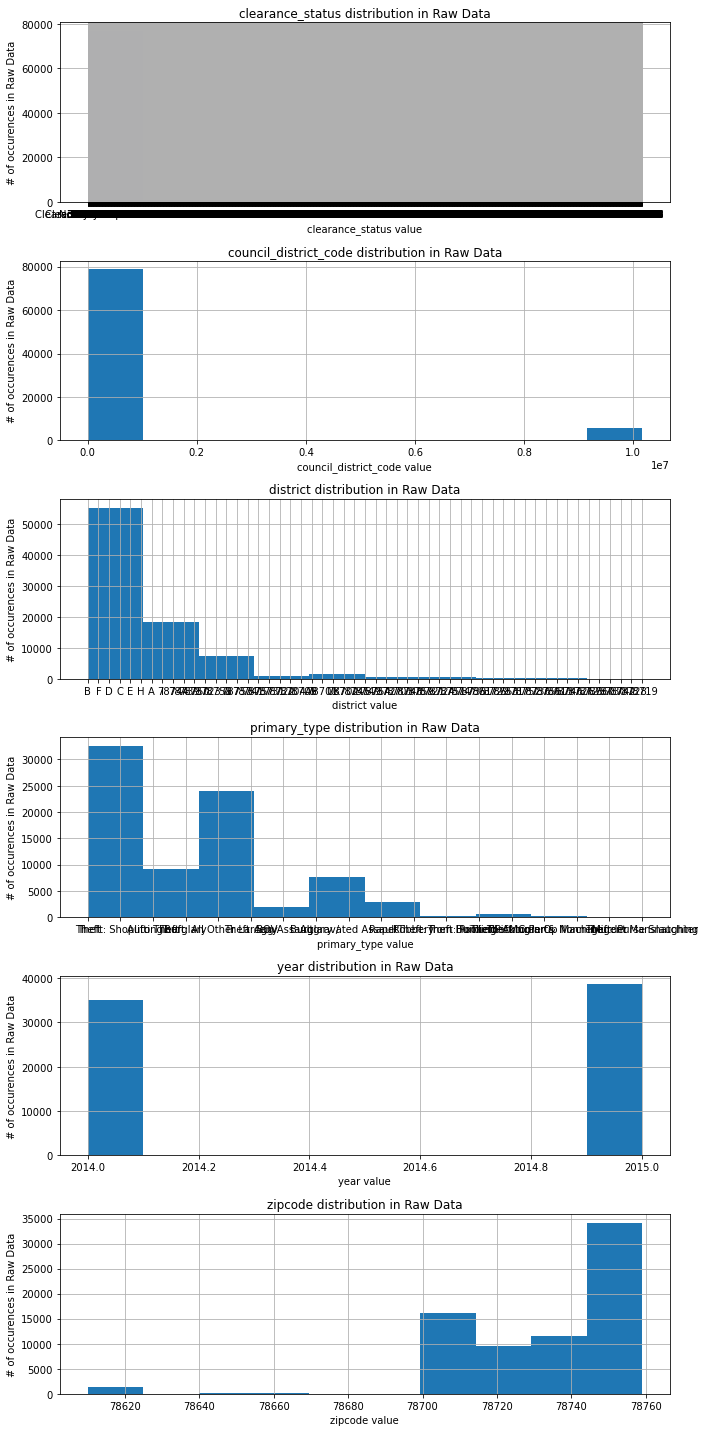

In [10]:
#plot distributions on raw data
plot_distributions(raw_data, categorical_columns)

In [11]:
#examine dictionary of the above distributions in raw_data
#noted that there are many labels with sparse entires, considering 'Other' category on several fields
raw_vc_dictionary_categorical = value_counts_dict_on_frame (raw_data, categorical_columns)
for entry in raw_vc_dictionary_categorical.values():
    print(entry)
    print()
    print()

NaN                     77984
Not cleared             62471
Cleared by Arrest       11275
Cleared by Exception     2073
3122189                    35
                        ...  
3101595                     1
3134231                     1
3118571                     1
3099195                     1
3112438                     1
Name: clearance_status, Length: 4073, dtype: int64


NaN           75008
3.0           12176
9.0           11767
4.0           11412
7.0            9190
              ...  
10046614.0        1
10108606.0        1
10030238.0        1
10063121.0        1
10115882.0        1
Name: council_district_code, Length: 4170, dtype: int64


NaN      74593
D        11346
E        10599
F         9811
B         9247
I         8971
A         8769
H         8030
C         6317
G         5584
78741      598
78753      440
78745      435
78758      412
78744      407
78702      374
78723      330
78704      318
AP         298
UK         242
78748      203
78757      189
78752    

In [12]:
##### START HERE!!!!!!!!!!!!!!!! ######
#exmine series 1/6 in ['clearance_status', 'council_district_code', 'district', 'primary_type', 'year', 'zipcode']
raw_vc_dictionary_categorical['clearance_status']

NaN                     77984
Not cleared             62471
Cleared by Arrest       11275
Cleared by Exception     2073
3122189                    35
                        ...  
3101595                     1
3134231                     1
3118571                     1
3099195                     1
3112438                     1
Name: clearance_status, Length: 4073, dtype: int64

In [13]:
#Begin creating 'categorized df' here when cycling back to EDA ********************************
#above we saw that most of the series are top heavy, create 'other' categories for the sparse categories to reduce
#the number of categories and see a better plot of the data
categorized_df = raw_data.copy()

In [14]:
#create df with full long/lat
long_lat_df = pd.DataFrame(categorized_df[['latitude','longitude']]).dropna()
long_lat_df

,latitude,longitude
4,30.298356,-97.719647
9,30.272154,-97.730002
14,30.201243,-97.709249
17,30.271198,-97.705609
20,30.356418,-97.731423
...,...,...
159450,30.312239,-97.662693
159453,30.393536,-97.645133
159456,30.405797,-97.744910
159459,30.207396,-97.728709


In [15]:
#check values
print(long_lat_df['latitude'].describe())
print()
print()
long_lat_df['longitude'].describe()

count    34500.000000
mean        30.292623
std          0.075921
min         30.088110
25%         30.232364
50%         30.278712
75%         30.353641
max         30.512564
Name: latitude, dtype: float64




count    34500.000000
mean       -97.737027
std          0.046538
min        -97.958825
25%        -97.760883
50%        -97.733608
75%        -97.704639
max        -97.580845
Name: longitude, dtype: float64

In [16]:
#create df with full long/lat
x_y_df = pd.DataFrame(categorized_df[['x_coordinate','y_coordinate']]).dropna()
x_y_df

,x_coordinate,y_coordinate
0,3113531.0,10079579.0
1,3099459.0,10032098.0
4,3121345.0,10082705.0
5,3110518.0,10052730.0
6,3115006.0,10043258.0
...,...,...
159453,3144046.0,10117185.0
159456,3112507.0,10120833.0
159459,3119195.0,10048844.0
159460,3111397.0,10118845.0


In [17]:
#check values
print(x_y_df['x_coordinate'].describe())
print()
print()
x_y_df['y_coordinate'].describe()

count    7.227300e+04
mean     3.115753e+06
std      1.487193e+04
min      3.040396e+06
25%      3.107626e+06
50%      3.116518e+06
75%      3.126112e+06
max      3.165466e+06
Name: x_coordinate, dtype: float64




count    7.227300e+04
mean     1.008020e+07
std      2.857694e+04
min      1.001032e+07
25%      1.005777e+07
50%      1.007602e+07
75%      1.010260e+07
max      1.015961e+07
Name: y_coordinate, dtype: float64

In [18]:
#%pip install descartes
#%pip install geopandas
#%pip install shapely

In [21]:
###STRONGLY CONSIDER TURNING FULL DATA INTO GEODATAFRAME + EXPLORE ####

<AxesSubplot:>

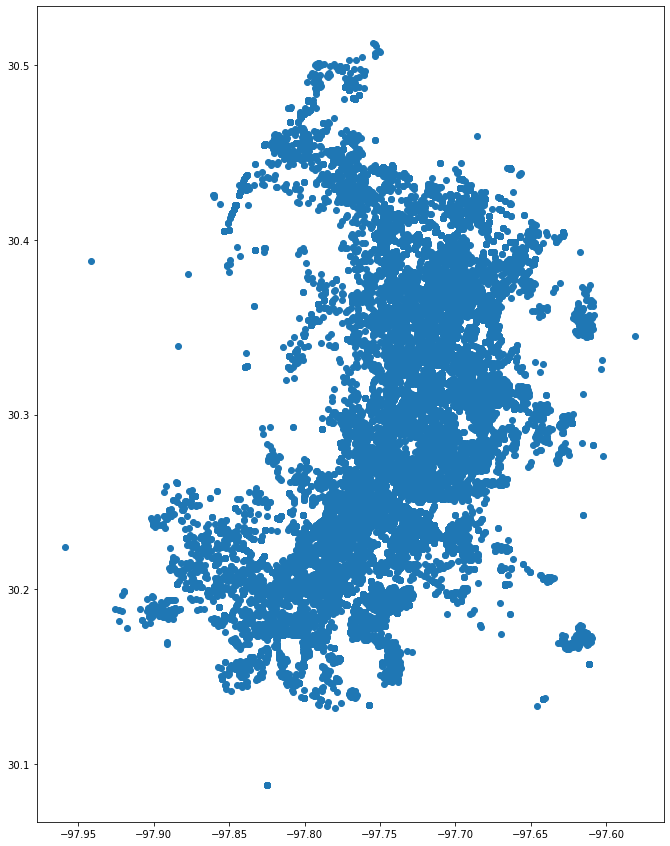

In [22]:
#crs = {'init': 'EPSG: 4326'}
geometry = [Point(xy) for xy in zip(long_lat_df['longitude'], long_lat_df['latitude'])]
austin_geo_df = gpd.GeoDataFrame(long_lat_df, crs = "EPSG:4326", geometry = geometry)
fig, ax = plt.subplots(figsize = (15,15))
#Austin.plot(ax = ax, alpha = .4, color = 'grey')
ax.set_title()
austin_geo_df.plot(ax = ax)

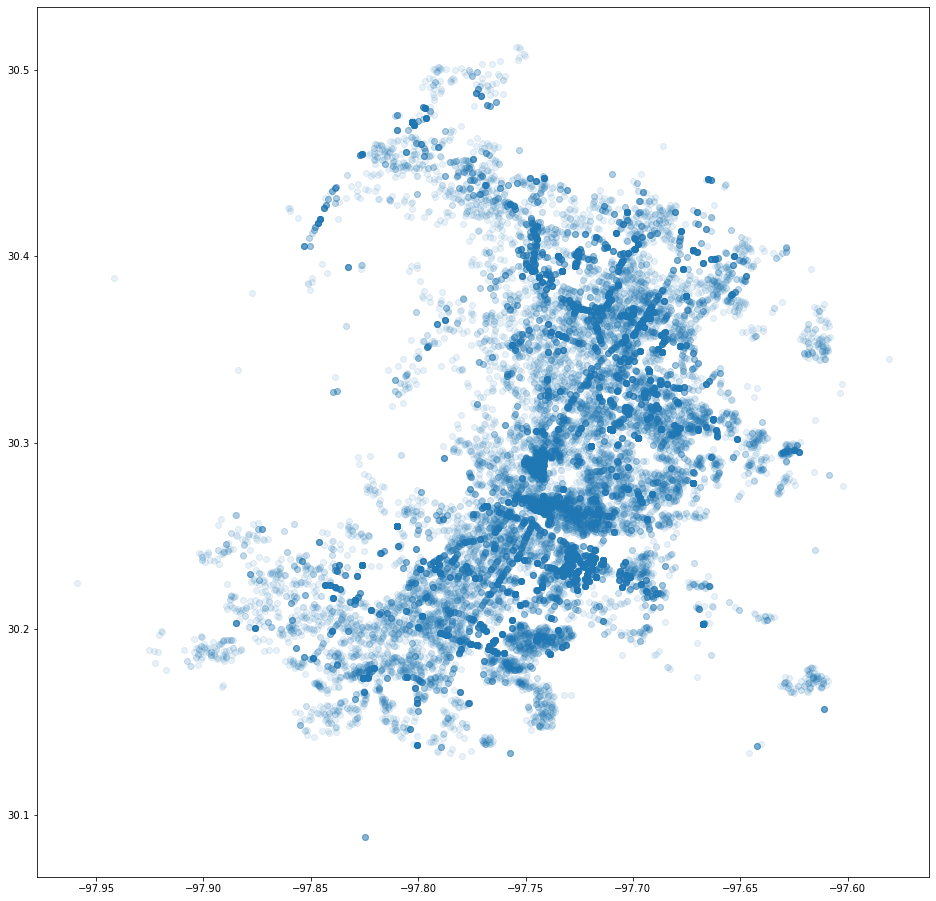

In [87]:
fig, ax = plt.subplots(figsize = (16, 16))
ax.scatter(long_lat_df['longitude'], long_lat_df['latitude'], alpha = .1)

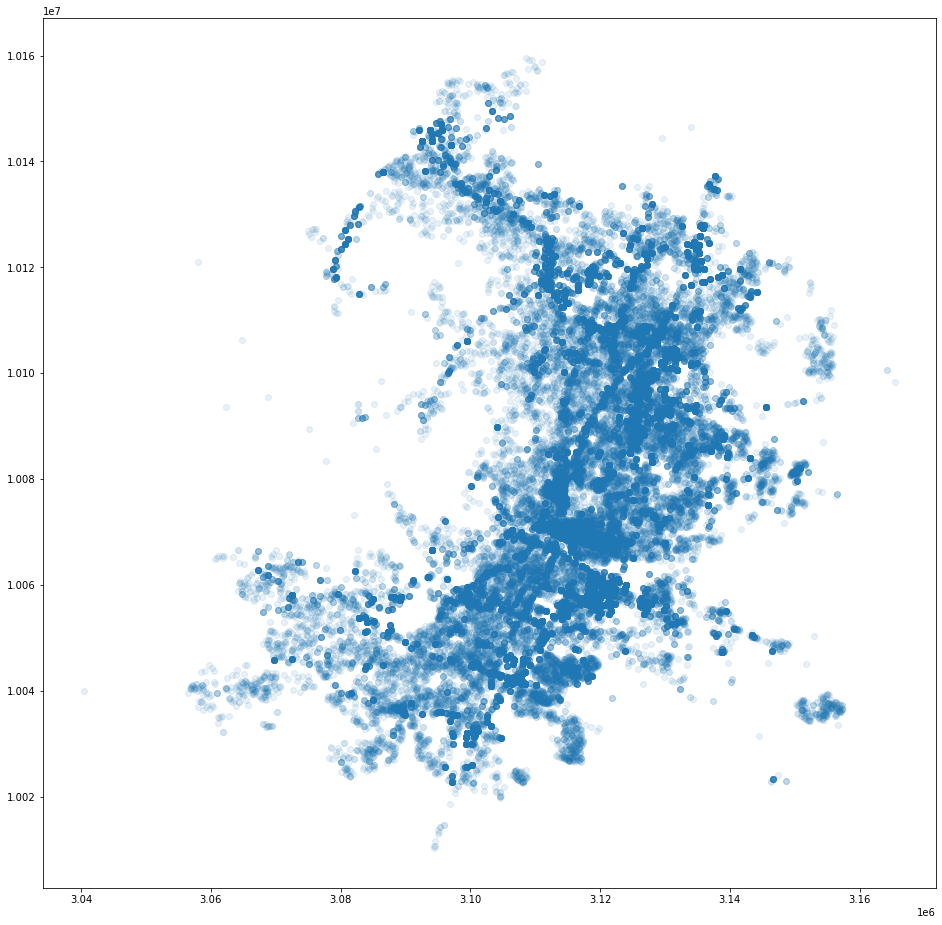

In [88]:
fig, ax = plt.subplots(figsize = (16, 16))
ax.scatter(x_y_df['x_coordinate'], x_y_df['y_coordinate'], alpha = .1)

# Euclidean

In [29]:
# Find highest silhouette score in range 2 - 20, Latitude/Longitude 
sil = []
maxk = 20

for k in range(2, maxk + 1):
    kmeans = KMeans(n_clusters = k).fit(long_lat_df.copy().drop('geometry', axis = 1))
    labels = kmeans.labels_
    sil.append(silhouette_score(long_lat_df.copy().drop('geometry', axis = 1), labels, metric = 'euclidean'))
sil

[0.4996993392280645,
 0.413294706074447,
 0.40263533300191645,
 0.38188592192816767,
 0.3669512322515533,
 0.3683309497435975,
 0.3638505450280179,
 0.37078151977013907,
 0.37083762083540095,
 0.3740968567192216,
 0.3777609501305271,
 0.3773752033710038,
 0.38434294691210136,
 0.3888883014313298,
 0.38022709332482185,
 0.39218949108256335,
 0.39392920021215044,
 0.3998025572239863,
 0.404531567908671]

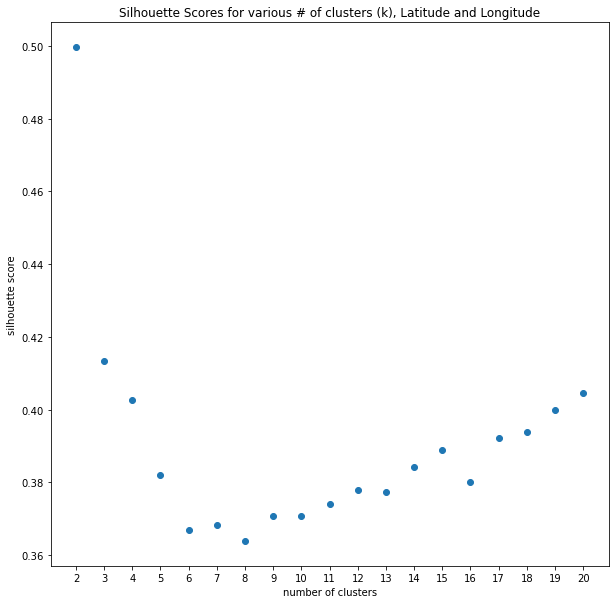

In [32]:
x = range(2,21)
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x, sil)
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.set_title('Silhouette Scores for various # of clusters (k), Latitude and Longitude')
ax.set_xticks([p for p in list(x)])

In [34]:
# Find highest silhouette score in range 2 - 20, x/y coordinates
sil = []
maxk = 20

for k in range(2, maxk + 1):
    kmeans = KMeans(n_clusters = k).fit(x_y_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(x_y_df, labels, metric = 'euclidean'))
sil

[0.5135017062007827,
 0.41821981583798096,
 0.40186717759219226,
 0.3923089049480053,
 0.3747780797453221,
 0.38506026493979084,
 0.3922455105315693,
 0.39608491383292177,
 0.39196443412128035,
 0.3924027093619297,
 0.39273253308023626,
 0.40196675363249124,
 0.39105144787202395,
 0.40124796620420555,
 0.4081900857813076,
 0.39205880840425944,
 0.4021082281435348,
 0.4153361132923438,
 0.41107788851952376]

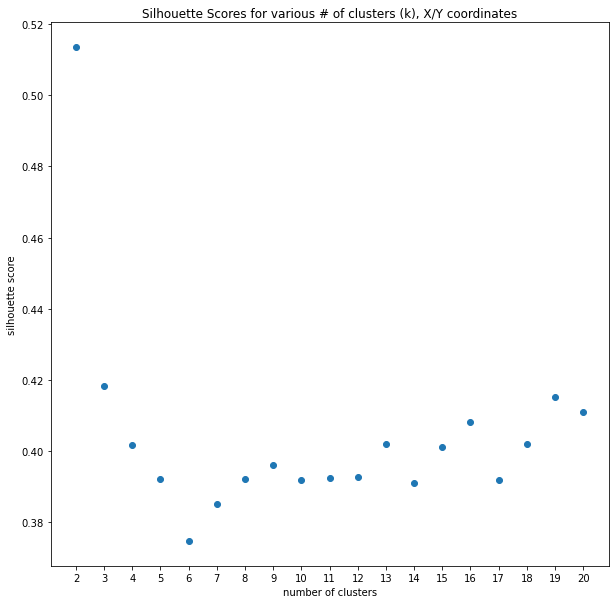

In [35]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x, sil)
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.set_title('Silhouette Scores for various # of clusters (k), X/Y coordinates')
ax.set_xticks([p for p in list(x)])

In [38]:
#silhouette playground
sil = []
mink = 30
maxk = 32

for k in range(mink, maxk + 1):
    kmeans = KMeans(n_clusters = k).fit(x_y_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(x_y_df, labels, metric = 'euclidean'))
sil

[0.4218110911435978, 0.4121563318454895, 0.4323970767825176]

# Manhattan

In [43]:
# Find highest silhouette score in range 2 - 9, Latitude/Longitude 
sil_m_ll = []
maxk = 20

for k in range(2, maxk + 1):
    kmeans = KMeans(n_clusters = k).fit(long_lat_df.copy().drop('geometry', axis = 1))
    labels = kmeans.labels_
    sil_m_ll.append(silhouette_score(long_lat_df.copy().drop('geometry', axis = 1), labels, metric = 'manhattan'))
sil_m_ll

[0.48878996193487206,
 0.4043470650574856,
 0.4000602043958157,
 0.38176707777008717,
 0.3678212873893379,
 0.37007578403502245,
 0.3655750010962958,
 0.36910542697221804,
 0.3703631497558905,
 0.3723207664788811,
 0.3731227878215513,
 0.38318802311926337,
 0.3835895827134607,
 0.382545912467384,
 0.39037844556020074,
 0.3911681684584146,
 0.3958605792121196,
 0.3908281593027059,
 0.3943660190961342]

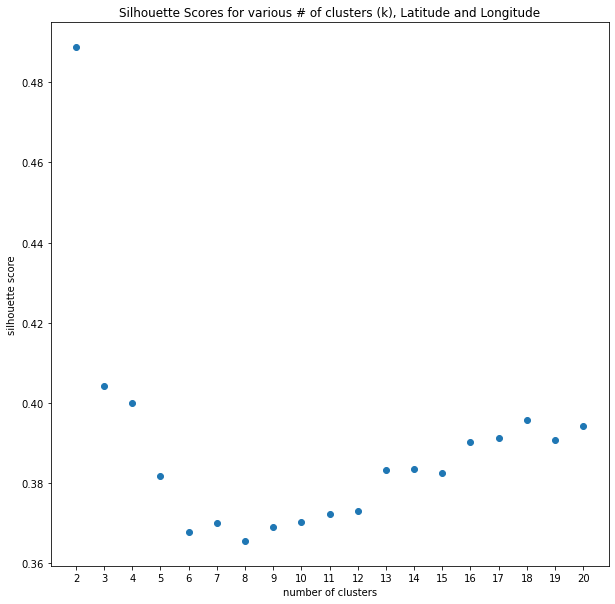

In [46]:
x = range(2,21)
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x, sil_m_ll)
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.set_title('Silhouette Scores for various # of clusters (k), Latitude and Longitude')
ax.set_xticks([p for p in list(x)])

In [44]:
# Find highest silhouette score in range 2 - 9, x/y coordinates
sil_m_xy = []
maxk = 20

for k in range(2, maxk + 1):
    kmeans = KMeans(n_clusters = k).fit(x_y_df)
    labels = kmeans.labels_
    sil_m_xy.append(silhouette_score(x_y_df, labels, metric = 'manhattan'))
sil_m_xy

[0.4988728325106089,
 0.40524774952567433,
 0.398490606481887,
 0.38886421263570203,
 0.37555693244552535,
 0.38352023244383776,
 0.39290255969616705,
 0.3854190648915026,
 0.38557162020824637,
 0.39144581371886084,
 0.3915162984638719,
 0.40236092016876923,
 0.4037482345015824,
 0.4062211419000457,
 0.41145637207626296,
 0.4029731820159947,
 0.40689785324662064,
 0.4042315910489457,
 0.40263226364427107]

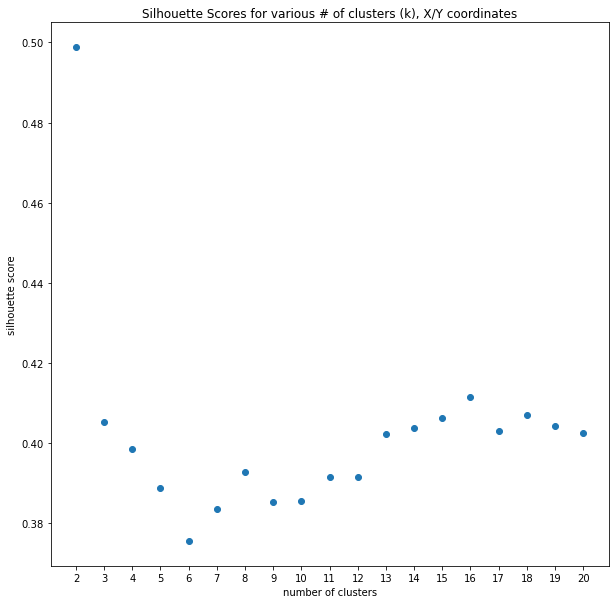

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x, sil_m_xy)
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.set_title('Silhouette Scores for various # of clusters (k), X/Y coordinates')
ax.set_xticks([p for p in list(x)])

In [61]:
# Chose to use K-Means, k = 2, for both clusters
# Create series containing cluster_id for both DataFrames
lon_lat_cluster = KMeans(n_clusters = 2).fit_predict(long_lat_df.drop('geometry', axis = 1))
x_y_cluster_series = KMeans(n_clusters = 2).fit_predict(x_y_df)

In [108]:
# More 0's in latitude/longitude clustering
Lon_lat_ratio = pd.Series(lon_lat_cluster).value_counts()
print(Lon_lat_ratio)

0    19007
1    15493
dtype: int64


In [109]:
# More 1's in X/Y coordinate clustering
x_y_ratio = pd.Series(x_y_cluster_series).value_counts()
print(x_y_ratio)

1    39514
0    32759
dtype: int64


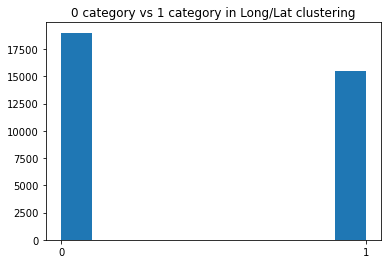

In [117]:
# plot the distributions
fig, ax = plt.subplots()
ax.hist(lon_lat_cluster)
ax.set_title('0 category vs 1 category in Long/Lat clustering')
ax.set_xticks([0,1])

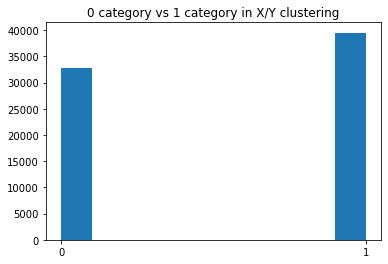

In [118]:
#plot the distributions
fig, ax = plt.subplots()
ax.hist(x_y_cluster_series)
ax.set_title('0 category vs 1 category in X/Y clustering')
ax.set_xticks([0,1])

In [64]:
print(f'type of Long/Lat cluster results = {type(lon_lat_cluster)}')
print(f'type of x/y cluster results = {type(x_y_cluster_series)}')

type of Long/Lat cluster results = <class 'numpy.ndarray'>
type of x/y cluster results = <class 'numpy.ndarray'>


In [60]:
long_lat_df

,latitude,longitude,geometry
4,30.298356,-97.719647,POINT (-97.71965 30.29836)
9,30.272154,-97.730002,POINT (-97.73000 30.27215)
14,30.201243,-97.709249,POINT (-97.70925 30.20124)
17,30.271198,-97.705609,POINT (-97.70561 30.27120)
20,30.356418,-97.731423,POINT (-97.73142 30.35642)
...,...,...,...
159450,30.312239,-97.662693,POINT (-97.66269 30.31224)
159453,30.393536,-97.645133,POINT (-97.64513 30.39354)
159456,30.405797,-97.744910,POINT (-97.74491 30.40580)
159459,30.207396,-97.728709,POINT (-97.72871 30.20740)


In [85]:
#drop geometry column.....#probably not enough time to experiment further with geopandas
longs_lats_cluster = long_lat_df.drop('geometry', axis = 1)

#add cluster column to DataFrames
x_y_df['x_y_cluster'] = x_y_cluster_series
longs_lats_cluster['long_lat_cluster'] = lon_lat_cluster

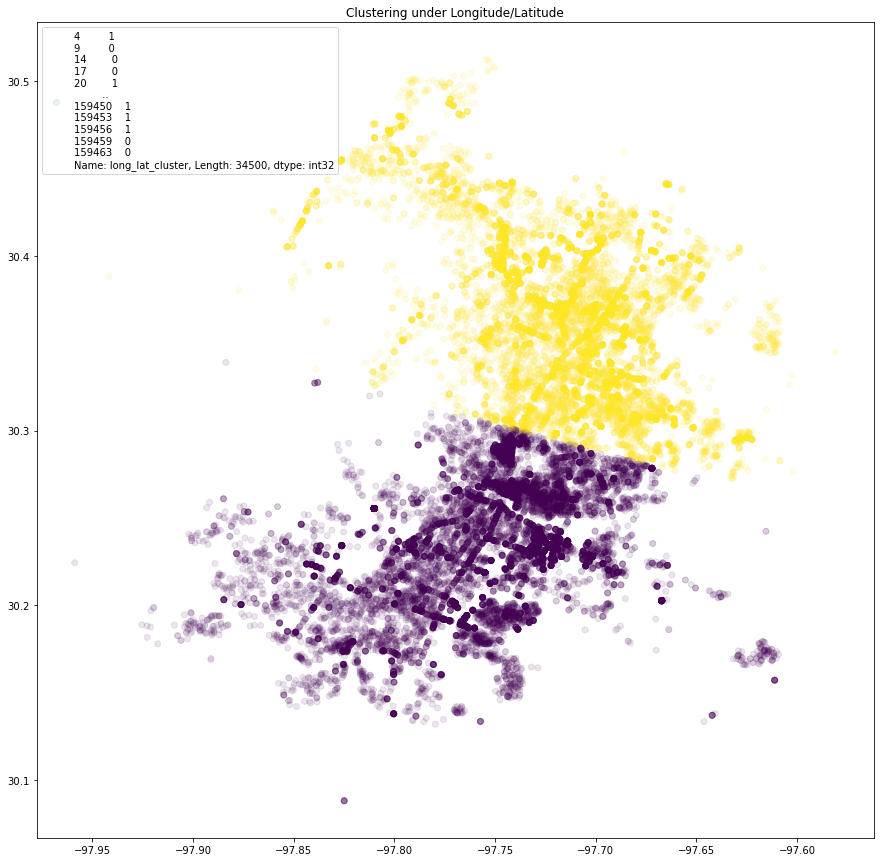

In [100]:
#plot the clusters 

fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(longs_lats_cluster['longitude'], longs_lats_cluster['latitude'], alpha = .1, c = longs_lats_cluster['long_lat_cluster'], label = longs_lats_cluster['long_lat_cluster'])
ax.set_title('Clustering under Longitude/Latitude')
ax.legend()

No handles with labels found to put in legend.


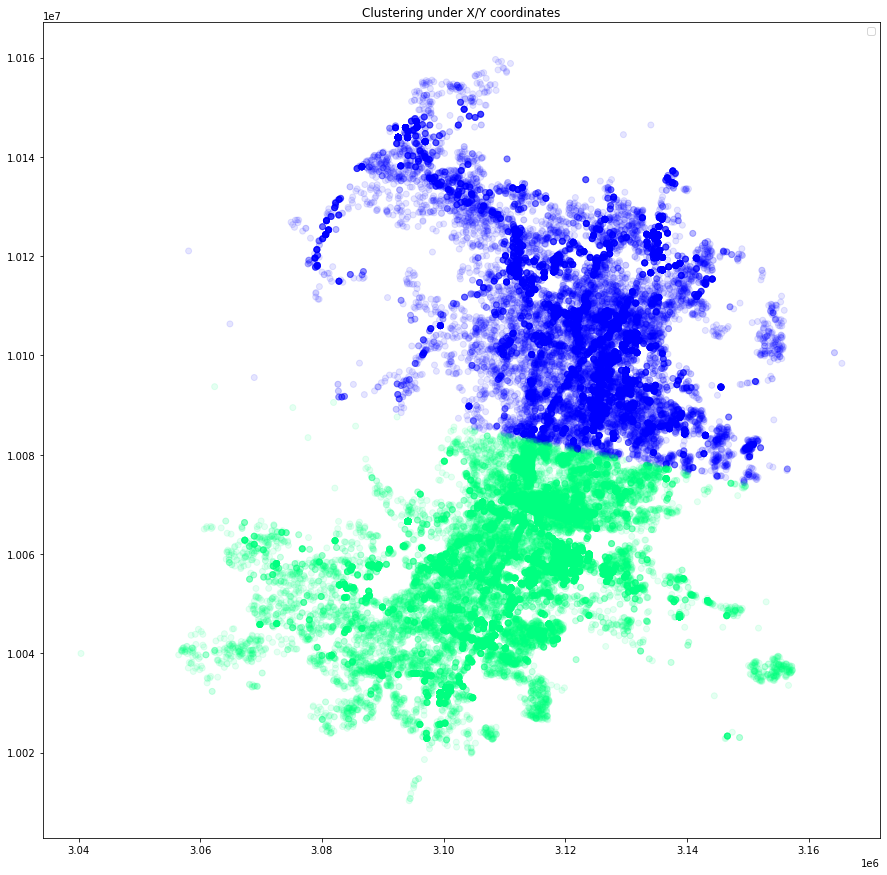

In [104]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(x_y_df['x_coordinate'], x_y_df['y_coordinate'], alpha = .1, c = x_y_df['x_y_cluster'], cmap = 'winter')
ax.set_title('Clustering under X/Y coordinates')
ax.legend()

In [74]:
#merge the two DataFrames
Cluster_Features = pd.merge(x_y_df, longs_lats_cluster, how = 'outer', left_on = x_y_df.index, right_on = longs_lats_cluster.index)
Cluster_Features = Cluster_Features.set_index('key_0')


Cluster_Features

,x_coordinate,y_coordinate,x_y_cluster,latitude,longitude,long_lat_cluster
key_0,,,,,,
0,3113531.0,10079579.0,1.0,NaN,NaN,NaN
1,3099459.0,10032098.0,1.0,NaN,NaN,NaN
4,3121345.0,10082705.0,0.0,30.298356,-97.719647,1.0
5,3110518.0,10052730.0,1.0,NaN,NaN,NaN
6,3115006.0,10043258.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
159296,NaN,NaN,NaN,30.387817,-97.698762,1.0
159305,NaN,NaN,NaN,30.196549,-97.734911,0.0
159326,NaN,NaN,NaN,30.348079,-97.689470,1.0


In [81]:
#merge the results of clustering to full DF

right_merge_columns = ['key_0', 'x_coordinate', 'y_coordinate', 'latitude', 'longitude']
left_merge_columns = [raw_data.index, 'x_coordinate', 'y_coordinate', 'latitude', 'longitude']

Austin_Crime_Clustered = pd.merge(raw_data, Cluster_Features, how = 'left', left_on = left_merge_columns, right_on = right_merge_columns)

Austin_Crime_Clustered = Austin_Crime_Clustered.drop('key_0', axis = 1)

Austin_Crime_Clustered

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159462,Austin TX 78741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
Austin_Crime_Clustered.to_csv('Austin_Crime_Clustered.csv')